# LAB #1 Homework for Niko Darby

## QUESTION #1: The multivariate random number generator uses a covariance that creates correlated features. You can see this in the scatterplot because the sample distribution is oriented from lower left to upper right.

#### Instantiate necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from matplotlib.colors import ListedColormap


#### Disclaimer: The Lab01 notebook from the GitHub was used as assistance for this section. Reference is being given to the Lab01 source. 

#### Set the data

In [2]:
xev = np.random.RandomState(87)
data = xev.randint(928,size=90)
data

array([486, 333, 699, 143, 251,   6, 902, 819, 352, 521, 572, 224,  61,
       110, 554, 200, 787, 163, 552,  72, 407, 853, 118, 350, 907, 882,
       254, 619, 345, 787, 616, 788, 492, 843, 858, 573, 377, 484, 910,
       911, 446, 569, 276, 895, 809, 394, 585, 648, 686, 559,  61, 676,
        31, 543, 331, 560, 777, 365, 725, 466, 614, 369, 503, 363, 326,
        30, 214, 674, 909, 168, 363, 388, 724,  70, 648,  94,  63, 222,
       816, 664, 620, 757, 657, 292, 551, 692,  74, 675,   5, 219])

#### Choose a covariance matrix that orients the scatterplot from upperleft to lower right.

In [3]:
average = [0,0]
the_covariance = [[-10, 10],
       [10, -10]]
neg_corr = xev.multivariate_normal(average, the_covariance, 1000)
neg_corr.shape

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


(1000, 2)

#### As you can see, simply making a single value in the covariance vectors "negative" causes a negative trend (from top left to bottom right): 

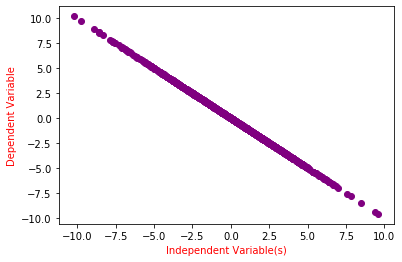

In [4]:
neg_corr_fig = plt.scatter(neg_corr[:,0], neg_corr[:,1], c='purple');
plt.xlabel('Independent Variable(s)', color= "red");
plt.ylabel('Dependent Variable', color= "red");

#### Choose a covariance matrix that makes the scatterplot uniform in all directions.

In [5]:
new_average = [0,0]
new_covariance = [[0, 1000],
       [1000, 0]]
uni_corr = xev.multivariate_normal(new_average, new_covariance, 10000)
uni_corr.shape

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


(10000, 2)

#### Below is an example of a radially uniform scatterplot with a 1:1 ratio: 

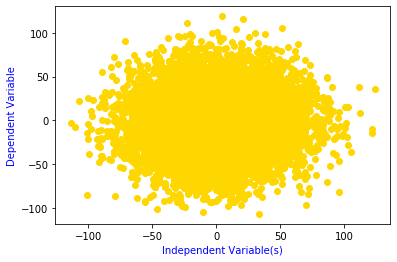

In [6]:
uni_corr_fig = plt.scatter(uni_corr[:,0], uni_corr[:,1], c='gold');
plt.xlabel('Independent Variable(s)', color= "blue");
plt.ylabel('Dependent Variable', color= "blue");

## QUESTION #2: The notebook computes sample mean two ways, a slow way using a Python for loop, and a fast way using numpy's vectorized np.average method.

### How big does n have to get before you notice the difference in means?

In [7]:
#Randomize the data:
avvy = np.random.RandomState(78)
avvy

RandomState(MT19937) at 0x1AE1CD0A8C8

In [8]:
#Create the n value:
zet = 100

In [9]:
#Create a dataset to run tests on:
savvy = avvy.randint(4378, size= zet)
savvy

array([ 470, 4136, 2744, 3476, 2163, 4174, 3843, 3596, 3704, 2091,  708,
        148, 1638, 1015, 1027, 1062, 3140, 3479, 3484, 1613, 4259,  101,
       3356, 2005, 3130,  322,  340, 2352, 3872, 2124, 1928,  276, 2108,
       3169, 2302, 1321,  895, 2438, 2607, 1382, 1190, 4008, 3238, 1690,
       3520, 3756, 4006, 2607, 2750, 4059, 2816, 2859, 2768,  179,   81,
       4205, 2712, 1515, 1674, 4061, 1342, 1974,   23, 3619, 3206, 2875,
       3306, 1365, 2202,  122, 3636, 3108, 2039,  492, 3834, 3999, 1424,
       2693, 1806, 1097,  465, 3952, 1911, 4346, 2005, 1251, 3728,  874,
        846, 4342, 3933, 1767, 2978, 2857, 1673, 4021,  389,  911, 1270,
       2538])

#### Quick Training Set (START)

In [10]:
a = 4259 
b = 101
c = 3356

In [11]:
i = 0 
u= 0
u = u + savvy[i]
i = i + 1
u = u + savvy[i]
i = i + 1
u = u + savvy[i]
i = i + 1
u = u + savvy[i]
i = i + 1
print(u)

10826


In [12]:
i = 0 
u= 0
for x in [0,0,0,0]:
    u = u + savvy[i]
    i = i + 1
print(u)
    
    

10826


In [13]:
i = 0 
u= 0
for i in [0,1,2,3]:
#     print(x)
    print(i)
    u = u + savvy[i]
#     i = i + 1
print(u)

0
1
2
3
10826


In [14]:
i = 0 
u= 0
for i in [0,1,2,3,4,5,6,7,8,9]:
    print(i)
    u = u + savvy[i]
print(u)
print(savvy[0:10].sum())

0
1
2
3
4
5
6
7
8
9
30397
30397


In [15]:
i = 0 
u= 0

for i in range(0,10,1):
    print(i)
    u = u + savvy[i]
print(u)
print(savvy[0:10].sum())

0
1
2
3
4
5
6
7
8
9
30397
30397


In [16]:
i = 0 
u= 0
l = savvy[0:10]

for i in l:
    print(i)
    u = u + i
print(u)
print(savvy[0:10].sum())

470
4136
2744
3476
2163
4174
3843
3596
3704
2091
30397
30397


In [17]:
i = 0 
u= 0
while i < 4:
    u = u + savvy[i]
    i = i + 1
print(u)
    

10826


In [18]:
(a + b) + c

7716

In [19]:
#Niko's For v. While Looping Training Study 

In [20]:
total = 0 
for i in range(0,98,1):
    # total = total + i 
    total += i
print(total)

4753


In [21]:
total = 0 
i = 0 
while i < 98:
    total += i
    i = i + 1
    print(i, total)

1 0
2 1
3 3
4 6
5 10
6 15
7 21
8 28
9 36
10 45
11 55
12 66
13 78
14 91
15 105
16 120
17 136
18 153
19 171
20 190
21 210
22 231
23 253
24 276
25 300
26 325
27 351
28 378
29 406
30 435
31 465
32 496
33 528
34 561
35 595
36 630
37 666
38 703
39 741
40 780
41 820
42 861
43 903
44 946
45 990
46 1035
47 1081
48 1128
49 1176
50 1225
51 1275
52 1326
53 1378
54 1431
55 1485
56 1540
57 1596
58 1653
59 1711
60 1770
61 1830
62 1891
63 1953
64 2016
65 2080
66 2145
67 2211
68 2278
69 2346
70 2415
71 2485
72 2556
73 2628
74 2701
75 2775
76 2850
77 2926
78 3003
79 3081
80 3160
81 3240
82 3321
83 3403
84 3486
85 3570
86 3655
87 3741
88 3828
89 3916
90 4005
91 4095
92 4186
93 4278
94 4371
95 4465
96 4560
97 4656
98 4753


In [22]:
total = 1 
i = 1 
while i < 98:
    total *= i
    i = i + 1
    print(i, total)

2 1
3 2
4 6
5 24
6 120
7 720
8 5040
9 40320
10 362880
11 3628800
12 39916800
13 479001600
14 6227020800
15 87178291200
16 1307674368000
17 20922789888000
18 355687428096000
19 6402373705728000
20 121645100408832000
21 2432902008176640000
22 51090942171709440000
23 1124000727777607680000
24 25852016738884976640000
25 620448401733239439360000
26 15511210043330985984000000
27 403291461126605635584000000
28 10888869450418352160768000000
29 304888344611713860501504000000
30 8841761993739701954543616000000
31 265252859812191058636308480000000
32 8222838654177922817725562880000000
33 263130836933693530167218012160000000
34 8683317618811886495518194401280000000
35 295232799039604140847618609643520000000
36 10333147966386144929666651337523200000000
37 371993326789901217467999448150835200000000
38 13763753091226345046315979581580902400000000
39 523022617466601111760007224100074291200000000
40 20397882081197443358640281739902897356800000000
41 815915283247897734345611269596115894272000000000
42 3

In [23]:
total = 0
for i in range(4,98,1):
    # total = total * i 
    total *= i
print(total)


0


In [24]:
total = 1
for i in range(4,98,1):
    total *= i
print(total)


16032126613747019975554737658260616452057302319862162693017412886555624268746979249800979862598178775210214031613279694607844638720000000000000000000000


#### Quick Training Set (END)

In [25]:
#Organize the data: 
excalibur = pd.DataFrame(savvy)
excalibur

,0
0,470
1,4136
2,2744
3,3476
4,2163
...,...
95,4021
96,389
97,911
98,1270


In [26]:
excalibur = excalibur.rename(columns={0:"Sample Count"})
excalibur

,Sample Count
0,470
1,4136
2,2744
3,3476
4,2163
...,...
95,4021
96,389
97,911
98,1270


In [27]:
#Observe the sum: 
excalibur.sum()

for x in savvy:
    print(x)

470
4136
2744
3476
2163
4174
3843
3596
3704
2091
708
148
1638
1015
1027
1062
3140
3479
3484
1613
4259
101
3356
2005
3130
322
340
2352
3872
2124
1928
276
2108
3169
2302
1321
895
2438
2607
1382
1190
4008
3238
1690
3520
3756
4006
2607
2750
4059
2816
2859
2768
179
81
4205
2712
1515
1674
4061
1342
1974
23
3619
3206
2875
3306
1365
2202
122
3636
3108
2039
492
3834
3999
1424
2693
1806
1097
465
3952
1911
4346
2005
1251
3728
874
846
4342
3933
1767
2978
2857
1673
4021
389
911
1270
2538


#### Now that the sum of excalibur has been observed, try to attain the mean in two ways. First use a "For Loop", then use the "np.average()" function: 

In [28]:
for u in excalibur:
    z = excalibur.sum()/zet
    print(z)

    

Sample Count    2319.11
dtype: float64


#### See how the above result only returns 2188.10008? Now try to procure the mean using "np.average": 

In [29]:
np.average(excalibur)

2319.11

#### The "np.average" function returns 2188.1000804. Once "n" (in our case "zet") reaches over one-million (1,000,000), the "For Loop" stops returning the entirety of the float or automatically converts the float to scientific notation. However, the "np.average" returns the entire float. 

# Lab #2 Homework for Niko Darby

## QUESTION #1: The two features used to train the perceptron in the lab are linearly separable. 

### Use two Iris features that are not linearly separable to demonstrate that the perceptron does not converge for non-separable classes. Make sure to investigate different values of the hyperparameters eta and n_iter.

In [30]:
from sklearn.datasets import load_iris
import sklearn

### Import the Perceptron class from the Lab #2 kernel:
#### DISCLAIMER: I, Niko Darby, did not create the Perceptron class - I am using the Perceptron class for the assigned homework. We were asked to investigate the Perceptron class thus I installed it here for investigation. 

In [31]:
# The Perceptron class with a API similar to scikit-learn

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#### Load the Iris data from SciKitLearn:

In [32]:
ultra_data = load_iris()
ultra_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
print(ultra_data.feature_names)
print(ultra_data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [34]:
feature_ultra_data = ultra_data.data
feature_ultra_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [35]:
ultra_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
ultra_frame = pd.DataFrame(feature_ultra_data).rename(columns={0:'sepal length (cm)', 1:'sepal width (cm)', 2:'petal length (cm)', 3:'petal width (cm)'})
ultra_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Create the "Targets" for the Iris Data:

In [37]:
Sa = ['Setosa'] * 50
Vc = ['Versicolor'] * 50
Vg = ['Virginica'] * 50
target_power = pd.DataFrame(Sa + Vc + Vg).rename(columns={0:'Targets'})
target_power


,Targets
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


#### Combine the "Targets" column to the preset Iris data from Sklearn: 

In [38]:
ultra_frame['Targets'] = target_power

In [39]:
ultra_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Targets
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Filter the data and create the X (x_filtered) and y (y_filtered) variables: 

In [40]:
#Filter the data being analyzed | Versicolor + Virginia:  

y_filtered = ultra_frame.iloc[50:150, 4].values
y_filtered = np.where(y_filtered == 'Versicolor', -1, 1)
y_filtered

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [41]:
x_filtered = ultra_frame.iloc[50:150, [2,3]].reset_index().drop(columns='index')
x_filtered

,petal length (cm),petal width (cm)
0,4.7,1.4
1,4.5,1.5
2,4.9,1.5
3,4.0,1.3
4,4.6,1.5
...,...,...
95,5.2,2.3
96,5.0,1.9
97,5.2,2.0
98,5.4,2.3


In [42]:
x_filtered = x_filtered.values

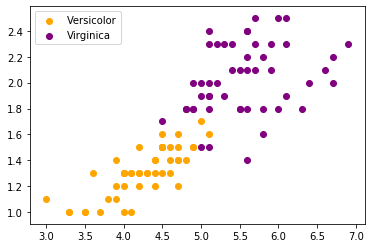

In [43]:
plt.scatter(x_filtered[0:50, 0], x_filtered[0:50,1], label="Versicolor", color="orange")
plt.scatter(x_filtered[50:100, 0], x_filtered[50:100,1], label="Virginica", color="purple")
plt.legend();

#### Disclaimer: The Perceptron function is not a creation of Niko Darby. This function is being utilized from the Fall 2020 GitHub for "DATA 602 Intro to Data Analysis and Machine Learning "

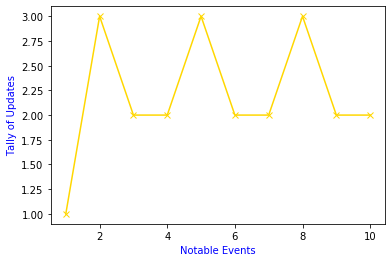

In [44]:
Percepticons = Perceptron(eta= 0.1, n_iter=10)
Percepticons.fit(x_filtered, y_filtered)

plt.plot(range(1, len(Percepticons.errors_) + 1), Percepticons.errors_, marker='x', color="gold")
plt.xlabel('Notable Events',color= 'blue')
plt.ylabel('Tally of Updates', color= 'blue');


### Disclaimer: The plot_decisions_regions() function is not a creation of Niko Darby. This function is being utilized from the Fall 2020 GitHub for "DATA 602 Intro to Data Analysis and Machine Learning "

In [45]:

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('v', '^', 'o', 'x', 's')
    colors = ('blue', 'gold', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

#### Below is a perceptron that does not converge for non-separable classes: 

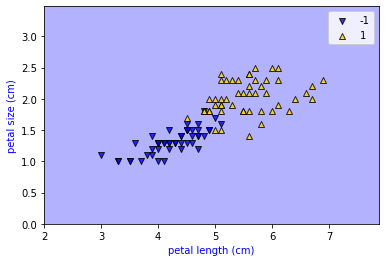

In [46]:
# Plot the decision region
plot_decision_regions(x_filtered, y_filtered, classifier=Percepticons)
plt.xlabel('petal length (cm)', color='blue')
plt.ylabel('petal size (cm)', color='blue')
plt.legend();

### Any sources mentioned in this Homework assignment were procured from the following Github Link: 
#### Source: https://github.com/umbcdata602/fall2020